In [974]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import xgboost
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [975]:
# Reading in the data
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\revised_percap_data.csv', index_col=0)

In [976]:
data.head(10)

,Population,Cannabis_Consumers_12+,Cannabis_Consumption_Percentage,Opioid_Deaths,Opioid_Deaths_Percentage,Total_Drug_Deaths,Total_Drug_Deaths_Percentage,Year
State,,,,,,,,
Alabama,"4,843,737","404,000",8.34%,303,0.0063%,723,0.0149%,2014
Alaska,"737,075","114,000",15.47%,91,0.0123%,124,0.0168%,2014
Arizona,"6,732,873","752,000",11.17%,606,0.0090%,"1,211",0.0180%,2014
Arkansas,"2,968,759","277,000",9.33%,180,0.0061%,356,0.0120%,2014
California,"38,586,706","4,633,000",12.01%,2139,0.0055%,"4,521",0.0117%,2014
Colorado,"5,352,637","909,000",16.98%,546,0.0102%,899,0.0168%,2014
Connecticut,"3,595,697","427,000",11.88%,600,0.0167%,623,0.0173%,2014
Delaware,"933,131","109,000",11.68%,145,0.0155%,189,0.0203%,2014
District of Columbia,"663,603","121,000",18.23%,69,0.0104%,96,0.0145%,2014


In [977]:
# Resetting index for State manipulation
data = data.reset_index()
data

,State,Population,Cannabis_Consumers_12+,Cannabis_Consumption_Percentage,Opioid_Deaths,Opioid_Deaths_Percentage,Total_Drug_Deaths,Total_Drug_Deaths_Percentage,Year
0,Alabama,"4,843,737","404,000",8.34%,303,0.0063%,723,0.0149%,2014
1,Alaska,"737,075","114,000",15.47%,91,0.0123%,124,0.0168%,2014
2,Arizona,"6,732,873","752,000",11.17%,606,0.0090%,"1,211",0.0180%,2014
3,Arkansas,"2,968,759","277,000",9.33%,180,0.0061%,356,0.0120%,2014
4,California,"38,586,706","4,633,000",12.01%,2139,0.0055%,"4,521",0.0117%,2014
5,Colorado,"5,352,637","909,000",16.98%,546,0.0102%,899,0.0168%,2014
6,Connecticut,"3,595,697","427,000",11.88%,600,0.0167%,623,0.0173%,2014
7,Delaware,"933,131","109,000",11.68%,145,0.0155%,189,0.0203%,2014
8,District of Columbia,"663,603","121,000",18.23%,69,0.0104%,96,0.0145%,2014
9,Florida,"19,853,880","1,990,000",10.02%,1611,0.0081%,"2,634",0.0133%,2014


In [978]:
# Checking for null values
data.isna().sum()

State                              0
Population                         0
Cannabis_Consumers_12+             0
Cannabis_Consumption_Percentage    0
Opioid_Deaths                      0
Opioid_Deaths_Percentage           0
Total_Drug_Deaths                  0
Total_Drug_Deaths_Percentage       0
Year                               0
dtype: int64

In [979]:
# Checking datatypes
data.dtypes

State                              object
Population                         object
Cannabis_Consumers_12+             object
Cannabis_Consumption_Percentage    object
Opioid_Deaths                       int64
Opioid_Deaths_Percentage           object
Total_Drug_Deaths                  object
Total_Drug_Deaths_Percentage       object
Year                                int64
dtype: object

In [980]:
# Label encoding
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)
data

,State,Population,Cannabis_Consumers_12+,Cannabis_Consumption_Percentage,Opioid_Deaths,Opioid_Deaths_Percentage,Total_Drug_Deaths,Total_Drug_Deaths_Percentage,Year
0,0,"4,843,737","404,000",8.34%,303,0.0063%,723,0.0149%,2014
1,1,"737,075","114,000",15.47%,91,0.0123%,124,0.0168%,2014
2,2,"6,732,873","752,000",11.17%,606,0.0090%,"1,211",0.0180%,2014
3,3,"2,968,759","277,000",9.33%,180,0.0061%,356,0.0120%,2014
4,4,"38,586,706","4,633,000",12.01%,2139,0.0055%,"4,521",0.0117%,2014
5,5,"5,352,637","909,000",16.98%,546,0.0102%,899,0.0168%,2014
6,6,"3,595,697","427,000",11.88%,600,0.0167%,623,0.0173%,2014
7,7,"933,131","109,000",11.68%,145,0.0155%,189,0.0203%,2014
8,8,"663,603","121,000",18.23%,69,0.0104%,96,0.0145%,2014
9,9,"19,853,880","1,990,000",10.02%,1611,0.0081%,"2,634",0.0133%,2014


In [981]:
# Checking datatypes
data.dtypes

State                               int32
Population                         object
Cannabis_Consumers_12+             object
Cannabis_Consumption_Percentage    object
Opioid_Deaths                       int64
Opioid_Deaths_Percentage           object
Total_Drug_Deaths                  object
Total_Drug_Deaths_Percentage       object
Year                                int64
dtype: object

In [982]:
# Stripping percentages and returning to standard form
data['Cannabis_Consumption_Percentage'] = data['Cannabis_Consumption_Percentage'].apply(lambda x: x.rstrip('%')).astype(float)/100
data['Opioid_Deaths_Percentage'] = data['Opioid_Deaths_Percentage'].apply(lambda x: x.rstrip('%')).astype(float)/100
data['Total_Drug_Deaths_Percentage'] = data['Total_Drug_Deaths_Percentage'].apply(lambda x: x.rstrip('%')).astype(float)/100

In [983]:
# Stripping commas from object columns for numeric conversion
col_list = ['Population', 'Cannabis_Consumers_12+','Total_Drug_Deaths']
for item in col_list:
    data[item] = data[item].apply(lambda x: x.replace(',',""))

In [984]:
# Converting numeric columns to float
data[['Population', 'Cannabis_Consumers_12+', 'Total_Drug_Deaths']] = data[['Population', 'Cannabis_Consumers_12+', 'Total_Drug_Deaths']].astype('int64')

In [985]:
# Checking datatypes
data.dtypes

State                                int32
Population                           int64
Cannabis_Consumers_12+               int64
Cannabis_Consumption_Percentage    float64
Opioid_Deaths                        int64
Opioid_Deaths_Percentage           float64
Total_Drug_Deaths                    int64
Total_Drug_Deaths_Percentage       float64
Year                                 int64
dtype: object

In [921]:
# Setting pandas dataframe display options to unlimited viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [986]:
data

,State,Population,Cannabis_Consumers_12+,Cannabis_Consumption_Percentage,Opioid_Deaths,Opioid_Deaths_Percentage,Total_Drug_Deaths,Total_Drug_Deaths_Percentage,Year
0,0,4843737,404000,0.0834,303,0.000063,723,0.000149,2014
1,1,737075,114000,0.1547,91,0.000123,124,0.000168,2014
2,2,6732873,752000,0.1117,606,0.000090,1211,0.000180,2014
3,3,2968759,277000,0.0933,180,0.000061,356,0.000120,2014
4,4,38586706,4633000,0.1201,2139,0.000055,4521,0.000117,2014
5,5,5352637,909000,0.1698,546,0.000102,899,0.000168,2014
6,6,3595697,427000,0.1188,600,0.000167,623,0.000173,2014
7,7,933131,109000,0.1168,145,0.000155,189,0.000203,2014
8,8,663603,121000,0.1823,69,0.000104,96,0.000145,2014
9,9,19853880,1990000,0.1002,1611,0.000081,2634,0.000133,2014


In [1049]:
# XGBOOST

In [1078]:
# split data into input and output columns
X, y = data.drop('Opioid_Deaths', axis = 1), data['Opioid_Deaths']

In [1079]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=500, max_depth=50, eta=0.01, subsample=0.8, colsample_bytree=0.9, tree_method="hist", eval_metric=mean_absolute_error)

In [1080]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [1081]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 102.843 (32.297)


In [1082]:
# XGBreg with KFold seems to deliver best MAE with dnn_model a close second.

In [1083]:
# Splitting train and test to have X_train and X_test specifically include every year but 2019 and 2020 and y_train and y_test to exclusively carry the years 2019 and 2020. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.285, shuffle = False)

In [1084]:
# fit model
model.fit(X_train, y_train, eval_set = [(X_train,y_train)])

[0]	validation_0-rmse:1423.60900	validation_0-mean_absolute_error:955.61585
[1]	validation_0-rmse:1411.34890	validation_0-mean_absolute_error:946.79864
[2]	validation_0-rmse:1399.01805	validation_0-mean_absolute_error:937.87659
[3]	validation_0-rmse:1386.75014	validation_0-mean_absolute_error:929.26679
[4]	validation_0-rmse:1374.74216	validation_0-mean_absolute_error:920.63525
[5]	validation_0-rmse:1362.48097	validation_0-mean_absolute_error:912.08160
[6]	validation_0-rmse:1350.51514	validation_0-mean_absolute_error:903.54706
[7]	validation_0-rmse:1338.19736	validation_0-mean_absolute_error:894.83752
[8]	validation_0-rmse:1326.15351	validation_0-mean_absolute_error:886.33112
[9]	validation_0-rmse:1314.38242	validation_0-mean_absolute_error:878.04175
[10]	validation_0-rmse:1302.50965	validation_0-mean_absolute_error:869.83997
[11]	validation_0-rmse:1290.65667	validation_0-mean_absolute_error:861.68433
[12]	validation_0-rmse:1279.05664	validation_0-mean_absolute_error:853.69861
[13]	vali

[108]	validation_0-rmse:555.04500	validation_0-mean_absolute_error:348.14816
[109]	validation_0-rmse:550.51941	validation_0-mean_absolute_error:344.94879
[110]	validation_0-rmse:545.92777	validation_0-mean_absolute_error:341.78854
[111]	validation_0-rmse:541.31835	validation_0-mean_absolute_error:338.60397
[112]	validation_0-rmse:536.91728	validation_0-mean_absolute_error:335.52881
[113]	validation_0-rmse:532.30076	validation_0-mean_absolute_error:332.40512
[114]	validation_0-rmse:527.68976	validation_0-mean_absolute_error:329.30264
[115]	validation_0-rmse:523.12834	validation_0-mean_absolute_error:326.14362
[116]	validation_0-rmse:518.68083	validation_0-mean_absolute_error:323.22299
[117]	validation_0-rmse:514.74756	validation_0-mean_absolute_error:320.32440
[118]	validation_0-rmse:510.49702	validation_0-mean_absolute_error:317.43607
[119]	validation_0-rmse:506.60824	validation_0-mean_absolute_error:314.63309
[120]	validation_0-rmse:502.41394	validation_0-mean_absolute_error:311.80017

[215]	validation_0-rmse:238.46125	validation_0-mean_absolute_error:133.05600
[216]	validation_0-rmse:236.66927	validation_0-mean_absolute_error:131.88414
[217]	validation_0-rmse:235.20784	validation_0-mean_absolute_error:130.75127
[218]	validation_0-rmse:233.53148	validation_0-mean_absolute_error:129.64494
[219]	validation_0-rmse:231.76382	validation_0-mean_absolute_error:128.51971
[220]	validation_0-rmse:230.11854	validation_0-mean_absolute_error:127.39288
[221]	validation_0-rmse:228.42068	validation_0-mean_absolute_error:126.29569
[222]	validation_0-rmse:226.77873	validation_0-mean_absolute_error:125.21796
[223]	validation_0-rmse:225.11563	validation_0-mean_absolute_error:124.16025
[224]	validation_0-rmse:223.59857	validation_0-mean_absolute_error:123.10318
[225]	validation_0-rmse:222.20371	validation_0-mean_absolute_error:122.09184
[226]	validation_0-rmse:220.58486	validation_0-mean_absolute_error:121.02350
[227]	validation_0-rmse:219.26373	validation_0-mean_absolute_error:119.99095

[323]	validation_0-rmse:115.86343	validation_0-mean_absolute_error:53.46823
[324]	validation_0-rmse:115.11567	validation_0-mean_absolute_error:53.02327
[325]	validation_0-rmse:114.55197	validation_0-mean_absolute_error:52.61499
[326]	validation_0-rmse:113.80691	validation_0-mean_absolute_error:52.18935
[327]	validation_0-rmse:113.17355	validation_0-mean_absolute_error:51.78682
[328]	validation_0-rmse:112.61093	validation_0-mean_absolute_error:51.39823
[329]	validation_0-rmse:111.95924	validation_0-mean_absolute_error:50.99355
[330]	validation_0-rmse:111.24523	validation_0-mean_absolute_error:50.58089
[331]	validation_0-rmse:110.53351	validation_0-mean_absolute_error:50.16829
[332]	validation_0-rmse:109.87168	validation_0-mean_absolute_error:49.76953
[333]	validation_0-rmse:109.18635	validation_0-mean_absolute_error:49.37321
[334]	validation_0-rmse:108.54815	validation_0-mean_absolute_error:49.00034
[335]	validation_0-rmse:107.86186	validation_0-mean_absolute_error:48.61235
[336]	valida

[432]	validation_0-rmse:63.10634	validation_0-mean_absolute_error:23.51596
[433]	validation_0-rmse:62.70689	validation_0-mean_absolute_error:23.33220
[434]	validation_0-rmse:62.33604	validation_0-mean_absolute_error:23.14748
[435]	validation_0-rmse:61.97833	validation_0-mean_absolute_error:22.97616
[436]	validation_0-rmse:61.61600	validation_0-mean_absolute_error:22.80913
[437]	validation_0-rmse:61.38922	validation_0-mean_absolute_error:22.65794
[438]	validation_0-rmse:61.19411	validation_0-mean_absolute_error:22.51377
[439]	validation_0-rmse:60.83940	validation_0-mean_absolute_error:22.35662
[440]	validation_0-rmse:60.53983	validation_0-mean_absolute_error:22.22098
[441]	validation_0-rmse:60.30979	validation_0-mean_absolute_error:22.07926
[442]	validation_0-rmse:59.96529	validation_0-mean_absolute_error:21.91956
[443]	validation_0-rmse:59.65378	validation_0-mean_absolute_error:21.76618
[444]	validation_0-rmse:59.29809	validation_0-mean_absolute_error:21.60184
[445]	validation_0-rmse:5

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=<function mean_absolute_error at 0x0000016198F1EC20>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=50,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [1085]:
# Confining result metric lists to variables
rmse = model.evals_result()['validation_0']['rmse']
mae = model.evals_result()['validation_0']['mean_absolute_error']

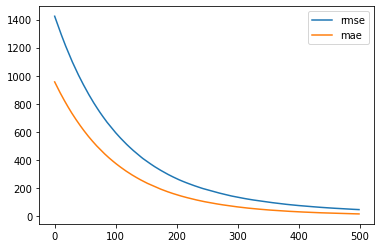

In [1086]:
# plot learning curves
plt.plot(rmse, label='rmse')
plt.plot(mae, label='mae')
# show the legend
plt.legend()
# show the plot
plt.show()

In [1087]:
# Wow, this model fit has incredible results for RMSE and MAE. XGBoost is quite the performer for small datasets after 500 epochs.

In [1088]:
# Create predictions from X_test
y_pr = model.predict(X_test)

In [1089]:
# Inspect predictions
y_pr

array([ 472.737,  112.651, 1517.971,  252.689, 2735.803,  698.252,
       1310.946,  499.711,  339.946, 4117.033, 1170.408,  106.295,
        207.238, 3182.45 , 1479.628,  211.869,  235.258, 1290.79 ,
        912.058,  384.815, 2710.72 , 2453.322, 2614.959,  487.562,
        285.696, 1437.113,   74.759,   69.854,  462.099,  423.951,
       3580.714,  512.073, 4103.774, 2487.233,   30.482, 4095.164,
        289.19 ,  386.782, 3875.209,  312.261, 1151.627,   29.687,
       2259.663, 1591.528,  516.019,  162.194, 1646.137,  892.671,
        978.853, 1239.908,   52.381,  780.367,  159.988, 2464.006,
        396.4  , 3297.207, 1292.789, 1357.836,  505.94 ,  456.507,
       4034.869, 1560.189,  179.792,  241.108, 4001.823, 2568.387,
        371.342,  376.282, 2459.449, 1652.197,  482.126, 3178.816,
       2528.1  , 3051.986, 1010.898,  461.966, 1756.569,  105.229,
        103.008,  818.775,  385.983, 3776.025,  628.524, 4144.782,
       3548.253,   59.483, 4508.009,  384.089,  570.823, 4156.

In [1090]:
len(y_pr)

102

Text(0, 0.5, 'Predictions')

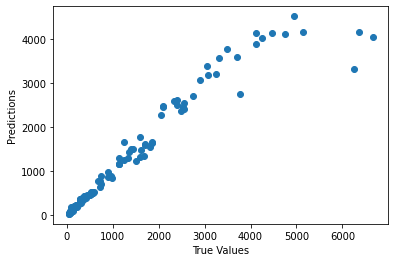

In [1063]:
# Comparing y_test with y_predictions
plt.scatter(y_test, y_pr)
plt.xlabel('True Values')
plt.ylabel('Predictions')

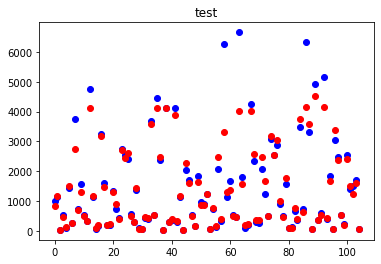

In [1064]:
# Plotting data points of y_test (blue) and y_predictions (red).
plotGraph(y_test, y_pr, "test")

In [1091]:
# Inserting zeros for all prior years to 2019 and 2020 to reform the length of the predictions list to comply with original dataframe.
for item in range(int(255)):
    y_pr = np.insert(y_pr, 0,0)

In [1092]:
# Checking to see if length matches original dataframe.
len(y_pr)

357

In [1093]:
# Storing updated y_predictions list in dataframe.
data['Opioid_death_predictions_XGBoost_2019-2020'] = y_pr
# Reversing Label Encoder to return State feature to it's original state.
data.State = le.inverse_transform(data.State)

In [1094]:
# Data Overview
data

,State,Population,Cannabis_Consumers_12+,Cannabis_Consumption_Percentage,Opioid_Deaths,Opioid_Deaths_Percentage,Total_Drug_Deaths,Total_Drug_Deaths_Percentage,Year,Opioid_death_predictions_XGBoost_2019-2020
0,Alabama,4843737,404000,0.0834,303,0.000063,723,0.000149,2014,0.000000
1,Alaska,737075,114000,0.1547,91,0.000123,124,0.000168,2014,0.000000
2,Arizona,6732873,752000,0.1117,606,0.000090,1211,0.000180,2014,0.000000
3,Arkansas,2968759,277000,0.0933,180,0.000061,356,0.000120,2014,0.000000
4,California,38586706,4633000,0.1201,2139,0.000055,4521,0.000117,2014,0.000000
5,Colorado,5352637,909000,0.1698,546,0.000102,899,0.000168,2014,0.000000
6,Connecticut,3595697,427000,0.1188,600,0.000167,623,0.000173,2014,0.000000
7,Delaware,933131,109000,0.1168,145,0.000155,189,0.000203,2014,0.000000
8,District of Columbia,663603,121000,0.1823,69,0.000104,96,0.000145,2014,0.000000
9,Florida,19853880,1990000,0.1002,1611,0.000081,2634,0.000133,2014,0.000000


In [1096]:
# Store new dataframe with predictions
data.to_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\revised_percap_data_with_predictions.csv',index=False)